# Time Series Analysis of Shortwave Upward Flux

Import

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import xarray as xr
import pandas as pd
import math
import random
import statistics 
from statistics import mode
from statsmodels.tsa.tsatools import detrend

NetCDF/HDF files

In [191]:
aqua_folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/Water/"
land_folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/Land/"
earthlike_folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/Earthlike/"

a_data1 = xr.open_dataset(aqua_folder + "a_jan.nc")
a_data2 = xr.open_dataset(aqua_folder + "a_feb.nc")
a_data3 = xr.open_dataset(aqua_folder + "a_mar.nc")
a_data4 = xr.open_dataset(aqua_folder + "a_apr.nc")
a_data5 = xr.open_dataset(aqua_folder + "a_may.nc")
a_data6 = xr.open_dataset(aqua_folder + "a_jun.nc")
a_data7 = xr.open_dataset(aqua_folder + "a_jul.nc")

l_data1 = xr.open_dataset(land_folder + "l_jan.nc")
l_data2 = xr.open_dataset(land_folder + "l_feb.nc")
l_data3 = xr.open_dataset(land_folder + "l_mar.nc")
l_data4 = xr.open_dataset(land_folder + "l_apr.nc")
l_data5 = xr.open_dataset(land_folder + "l_may.nc")
l_data6 = xr.open_dataset(land_folder + "l_jun.nc")
l_data7 = xr.open_dataset(land_folder + "l_jul.nc")

e_data1 = xr.open_dataset(earthlike_folder + "e_jan.nc")
e_data2 = xr.open_dataset(earthlike_folder + "e_feb.nc")
e_data3 = xr.open_dataset(earthlike_folder + "e_mar.nc")
e_data4 = xr.open_dataset(earthlike_folder + "e_apr.nc")
e_data5 = xr.open_dataset(earthlike_folder + "e_may.nc")
e_data6 = xr.open_dataset(earthlike_folder + "e_jun.nc")
e_data7 = xr.open_dataset(earthlike_folder + "e_jul.nc")

In [192]:
vi_Folder = "C:/Users/cenwe/Downloads/Programming/Python/vegetation_index/"
vi_list = []

for y in range(1, 9):
    for x in range(1, 10):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.200" + str(x) + "0" + str(y) + ".005.hdf").NDVI)
    for x in range(10, 15):
        vi_list.append(xr.open_dataset(vi_Folder + "MODVI.20" + str(x) + "0" + str(y) + ".005.hdf").NDVI)

## Graph

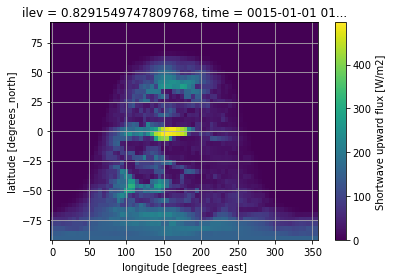

In [193]:
FUSGraph = e_data1.FUS.isel(time = 0, ilev = 0)
#plt.figure(figsize=(14,7))
FUSGraph.plot(robust = False)
plt.grid(True)

---
### Earthlike Flux

NDVI

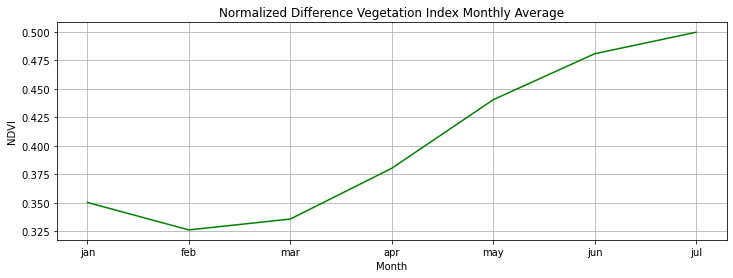

In [194]:
monthlyVIArray = []
tempSum = 0

for x in range(112):
    tempSum += vi_list[x].where(vi_list[x] >= 0).mean()
    if x % 14 == 0 and x != 0:
        monthlyVIArray.append(tempSum/14)
        tempSum = 0

plt.figure(figsize=(12,4))    
plt.plot(monthlyVIArray, color='green');
plt.grid(True)
plt.xticks(np.arange(0, 7, 1), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul']);
plt.title('Normalized Difference Vegetation Index Monthly Average')
plt.ylabel('NDVI')
plt.xlabel('Month');

In [195]:
def appendAll(inputArray, inputList):
    for t in range(len(inputList)):
        inputArray.append(inputList.isel(time = t).mean())
    return inputArray

FUS

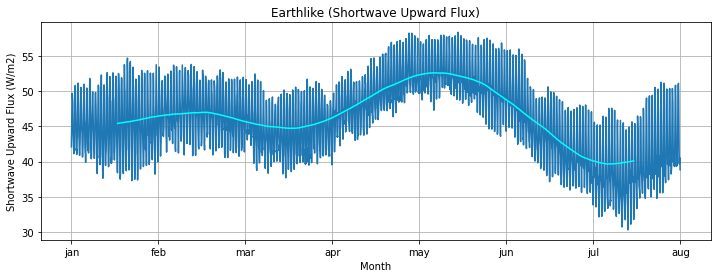

In [196]:
e_annualArrayFUS = []

e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data1.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data2.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data3.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data4.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data5.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data6.FUS)
e_annualArrayFUS = appendAll(e_annualArrayFUS, e_data7.FUS)

plt.figure(figsize=(12,4))
plt.title('Earthlike (Shortwave Upward Flux)')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFUS)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
plt.plot(e_annualArrayFUS);
plt.plot(movingMean, color='cyan');
#plt.plot(shiftedmm, linewidth=2);

FUSC

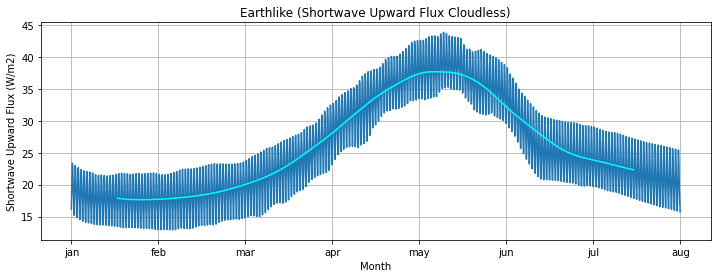

In [197]:
e_annualArrayFUSC = []
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data1.FUSC)
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data2.FUSC)
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data3.FUSC)
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data4.FUSC)
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data5.FUSC)
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data6.FUSC)
e_annualArrayFUSC = appendAll(e_annualArrayFUSC, e_data7.FUSC)

plt.figure(figsize=(12,4))
plt.title('Earthlike (Shortwave Upward Flux Cloudless)')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFUSC)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
plt.plot(e_annualArrayFUSC);
plt.plot(movingMean, color='cyan');
#plt.plot(shiftedmm, linewidth=2);

FUL

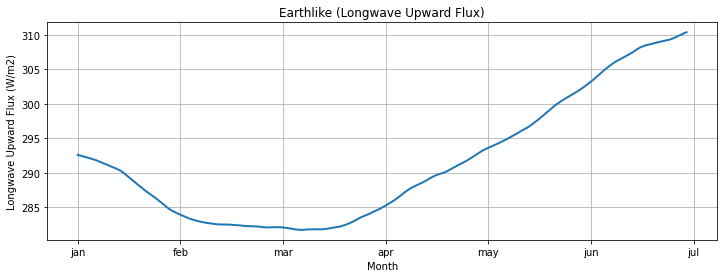

In [198]:
e_annualArrayFUL = []
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data1.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data2.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data3.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data4.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data5.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data6.FUL)
e_annualArrayFUL = appendAll(e_annualArrayFUL, e_data7.FUL)

plt.figure(figsize=(12,4))
plt.title('Earthlike (Longwave Upward Flux)')
plt.ylabel('Longwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFUL)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
#plt.plot(e_annualArrayFUL, color='brown');
#plt.plot(movingMean, color='red');
plt.plot(shiftedmm, linewidth=2);

FULC

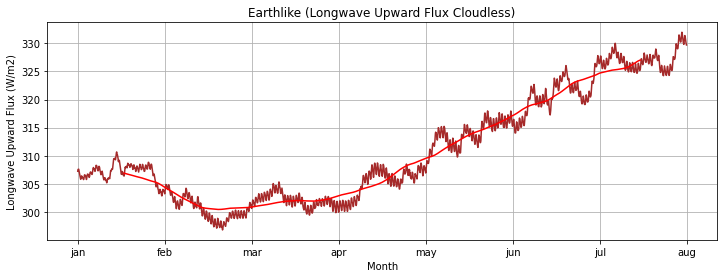

In [199]:
e_annualArrayFULC = []
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data1.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data2.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data3.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data4.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data5.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data6.FULC)
e_annualArrayFULC = appendAll(e_annualArrayFULC, e_data7.FULC)

plt.figure(figsize=(12,4))
plt.title('Earthlike (Longwave Upward Flux Cloudless)')
plt.ylabel('Longwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']);
#Get moving average
FUSdf = pd.DataFrame(e_annualArrayFULC)
movingMean = FUSdf.rolling(384).mean()
movingMean = movingMean.shift(-192)
shiftedmm = movingMean.shift(-192)
plt.plot(e_annualArrayFULC, color='brown');
plt.plot(movingMean, color='red');
#plt.plot(shiftedmm, linewidth=2);

---
### Ocean Flux

FUS

FUL

---
### Land Flux

FUS

FUL

## Fourier Power Spectrum Analysis

In [200]:
#### Reset
def reset(fftInput):
    fftOutput = np.array(fftInput) #Reset to default & convert list to numpy arrays
    return fftOutput

#### Scenario 1: Unevenly spaced time series
def scenario1(fftInput, chance):
    for i in range(len(fftInput)):
        if random.random() < chance:
            fftInput[i] = fftInput[i-1]
    return fftInput

#### Scenario 2: Few time series samples
def scenario2(fftInput, dailydp):
    fftInput = np.array(annualArrayFUS)
    counter = 0
    for i in range(len(fftInput)):
        if counter < 12 / dailydp:
            fftInput[i] = fftInput[i-1]
            counter = counter + 1
        else:
            counter = 0
    return fftInput

#### Scenario 3: Random fluctuations
def scenario3(fftInput, chance, magnitude):
    fluctuation_chance = chance
    fluctuation_magnitude = magnitude
    randomNum = random.random()
    for i in range(len(fftInput)):
        if randomNum < fluctuation_chance/2:
            fftInput[i] = fftInput[i] + random.random()*fluctuation_magnitude
        elif randomNum > 1 - fluctuation_chance/2:
            fftInput[i] = fftInput[i] - random.random()*fluctuation_magnitude
    return fftInput

#### Scenario 4: Sections averaged for exposure time
def scenario4(fftInput, length):
    tempMean = 0
    counter = 0

    for i in range(len(fftInput)):
        counter += 1
        if counter >= length or i == len(fftInput)-1:
            for j in range(int(counter)):
                tempMean = tempMean + fftInput[i - j]
            tempMean = tempMean / counter
            
            for x in range(int(counter)):
                fftInput[i - x] = tempMean

            tempMean = 0
            counter -= length
            
    return fftInput

#### Get graph parameters
def findFourier(fftInput):
    fourierTransform = np.fft.fft(fftInput)
    fourierTransform = fourierTransform[0:int(len(fftInput)/2)]
    powerSpectrum = fourierTransform
    frequency = np.arange(0, len(fftInput)/2)
    return powerSpectrum, frequency

#### Fourier transform graph

203054773.23054472
200


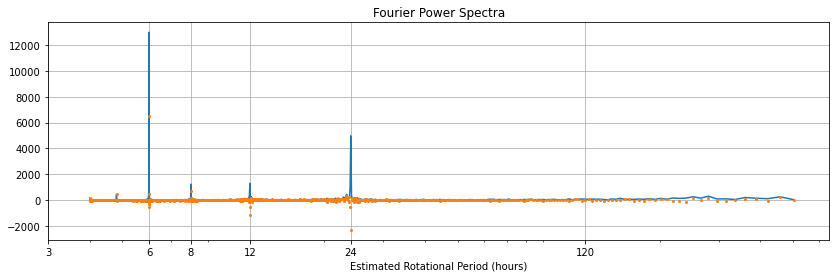

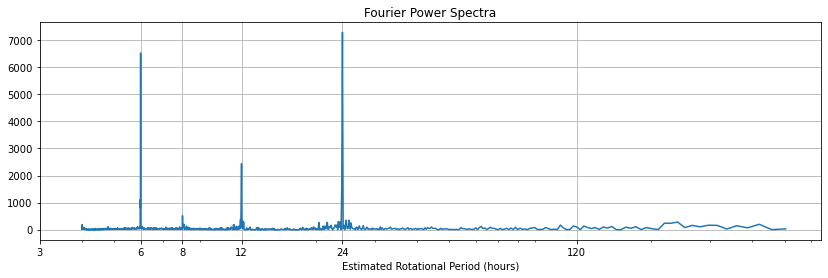

In [210]:
fftInput = reset(e_annualArrayFUS)
samplingInterval = 3 #Sampling interval(hr)
fftInput = scenario4(fftInput, samplingInterval/2)
powerSpectrum, frequency = findFourier(fftInput)
detrendSpectrum = detrend(powerSpectrum, 7)

start = 10
end = 2520
dpInterval = 2

fig, ax1 = plt.subplots(figsize=(14,4))
ax1.plot(1/frequency[start:end]*len(fftInput)*dpInterval, abs(powerSpectrum)[start:end])
ax1.plot(1/frequency[start:end]*len(fftInput)*dpInterval, detrendSpectrum.real[start:end], 'o', markersize=2)
ax1.set_yscale('linear')
ax1.set_xscale('log')
ax1.grid(True)
ax1.set_xticks([3, 6, 8, 12, 24, 120])
ax1.get_xaxis().set_major_formatter(ScalarFormatter())
ax1.set_title('Fourier Power Spectra');
ax1.set_xlabel('Estimated Rotational Period (hours)');

detrendedData = abs(powerSpectrum)[start:end]-detrendSpectrum.real[start:end]
fig, ax2 = plt.subplots(figsize=(14,4))
ax2.plot(1/frequency[start:end]*len(fftInput)*dpInterval, detrendedData)
ax2.set_yscale('linear')
ax2.set_xscale('log')
ax2.grid(True)
ax2.set_xticks([3, 6, 8, 12, 24, 120])
ax2.get_xaxis().set_major_formatter(ScalarFormatter())
ax2.set_title('Fourier Power Spectra');
ax2.set_xlabel('Estimated Rotational Period (hours)');
print(sum((abs(powerSpectrum)-detrendSpectrum.real)**2))
print(detrendedData.tolist().index(max(detrendedData)))

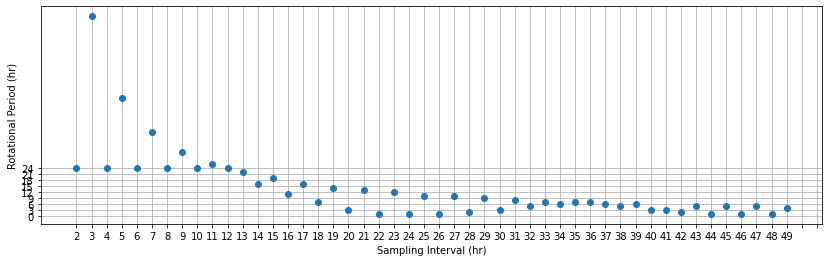

In [212]:
start = 10
end = 2520
dpInterval = 2
peakArray = []
npdataset = reset(e_annualArrayFUS[:])

for x in range(2, 50, 1):
    samplingInterval = x #Sampling interval(hr)
    fftInput = list(npdataset)
    fftInput = scenario4(fftInput, samplingInterval/2)
    powerSpectrum, frequency = findFourier(fftInput)
    psList = abs(powerSpectrum[start:end]).tolist()
    estimated_days = psList.index(max(psList[start:end]))
    peakArray.append(int(estimated_days/199*24))

plt.figure(figsize=(14,4))
plt.plot(peakArray, 'o')
plt.ylabel('Rotational Period (hr)')
plt.xlabel('Sampling Interval (hr)')
plt.grid(True)
plt.xticks(np.arange(0, 50, 1), np.arange(2, 50, 1));
plt.yticks(np.arange(0, 25, 3), np.arange(0, 25, 3));

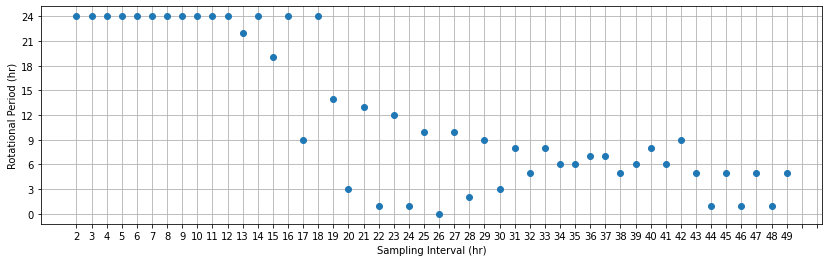

In [211]:
start = 10
end = 2520
dpInterval = 2
peakArray = []
npdataset = reset(e_annualArrayFUS[:])

for x in range(2, 50, 1):
    samplingInterval = x #Sampling interval(hr)
    fftInput = list(npdataset)
    fftInput = scenario4(fftInput, samplingInterval/2)
    powerSpectrum, frequency = findFourier(fftInput)
    detrendSpectrum = detrend(powerSpectrum, 7)
    detrendedData = abs(powerSpectrum)[start:end]-detrendSpectrum.real[start:end]
    peakArray.append(int(detrendedData.tolist().index(max(detrendedData))/199*24))

plt.figure(figsize=(14,4))
plt.plot(peakArray, 'o')
plt.ylabel('Rotational Period (hr)')
plt.xlabel('Sampling Interval (hr)')
plt.grid(True)
plt.xticks(np.arange(0, 50, 1), np.arange(2, 50, 1));
plt.yticks(np.arange(0, 25, 3), np.arange(0, 25, 3));

In [203]:
def getPeak(fftInput, start, sampleRange, interval):
    errorArray = []
    tempMean = 0
    fftOutput = reset(fftInput)
    xRange = 1000 #Number of random samples
    correctDays = 0
    psList = []
    fftOutput = scenario4(fftOutput, interval)
    tempfft = fftOutput
    correctEstimate = 0
    for x in range(xRange):
        randomNum = random.random()*(int(len(fftOutput)/sampleRange)-1)
        fftOutput = tempfft
        powerSpectrum, frequency = findFourier(fftOutput[int(randomNum*sampleRange):int(randomNum*sampleRange + sampleRange)])
        
        psList = abs(powerSpectrum).tolist()
        estimated_days = psList.index(max(psList[start:]))
        errorArray.append(estimated_days)
        if estimated_days >= int(sampleRange/12)-1 and estimated_days <= int(sampleRange/12)+1:
            correctDays += 1
    
    return errorArray, correctDays

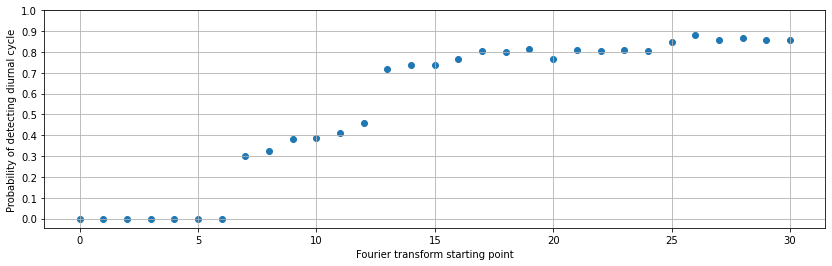

In [204]:
correctArray = []

samplingInterval = 20 #Sampling interval(hr)
sampleRange = 360

for x in range(int(sampleRange/12)+1):
    #(graph, start, sampleRange, interval)
    errorArray, correctDays = getPeak(e_annualArrayFUS, x, sampleRange, samplingInterval/2)
    correctChance = correctDays/1000
    correctArray.append(correctChance)


plt.figure(figsize=(14,4))
plt.scatter(np.arange(0, int(sampleRange/12)+1, 1), correctArray)
plt.grid(True)
plt.ylabel('Probability of detecting diurnal cycle');
plt.xlabel('Fourier transform starting point');
plt.yticks(np.arange(0, 1.1, 0.1));

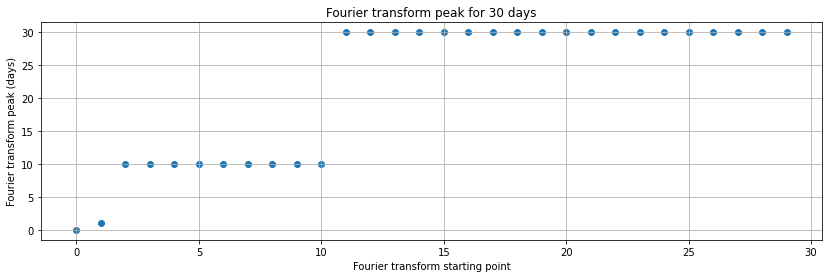

In [205]:
modeArray = []

samplingInterval = 18 #Sampling interval(hr)
sampleRange = 360

for x in range(30):
    errorArray, correctDays = getPeak(e_annualArrayFUS, x, sampleRange, samplingInterval/2)
    modeArray.append(mode(errorArray))

plt.figure(figsize=(14,4))
plt.scatter(np.arange(0, 30, 1), modeArray)
plt.grid(True)
plt.title('Fourier transform peak for 30 days');
plt.ylabel('Fourier transform peak (days)');
plt.xlabel('Fourier transform starting point');